Загрузка данных

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np

In [3]:
# Загрузка данных о домах
house_data = pd.read_csv("boston.csv")

In [4]:
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
house_data.duplicated().sum()

0

In [7]:
house_data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [8]:
house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']] = house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']].interpolate(method='linear', limit_direction='forward')

In [9]:
house_data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [10]:
house_data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.676492,8.714302,0.006320,0.080573,0.256510,3.689388,88.976200
ZN,506.000000,11.419960,23.231082,0.000000,0.000000,0.000000,13.625000,100.000000
INDUS,506.000000,11.127105,6.853911,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.000000,0.067194,0.250605,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.000000,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,506.000000,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,506.000000,68.694071,27.909935,2.900000,45.450000,77.150000,93.975000,100.000000
DIS,506.000000,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,506.000000,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.000000,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


In [11]:
# Загрузка данных об ирисах
iris_data = pd.read_csv("Iris.csv")

In [12]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
iris_data.duplicated().sum()

0

In [15]:
iris_data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [16]:
iris_data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000
SepalLengthCm,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
l = LabelEncoder()
iris_data['Species'] = l.fit_transform(iris_data['Species'])

In [19]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


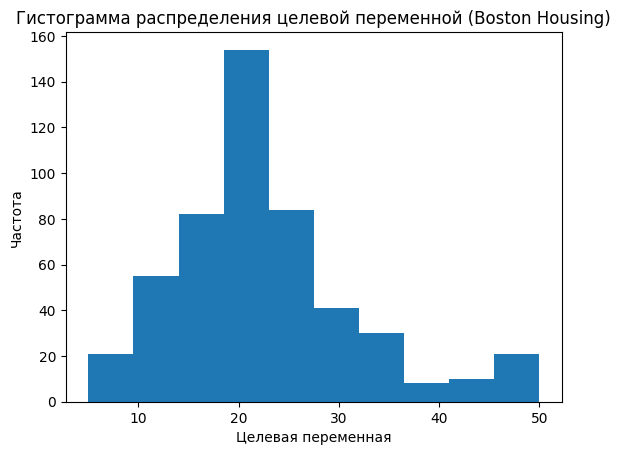

In [20]:
plt.hist(house_data['MEDV'], bins=10)
plt.xlabel('Целевая переменная')
plt.ylabel('Частота')
plt.title('Гистограмма распределения целевой переменной (Boston Housing)')
plt.show();

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Iris)')

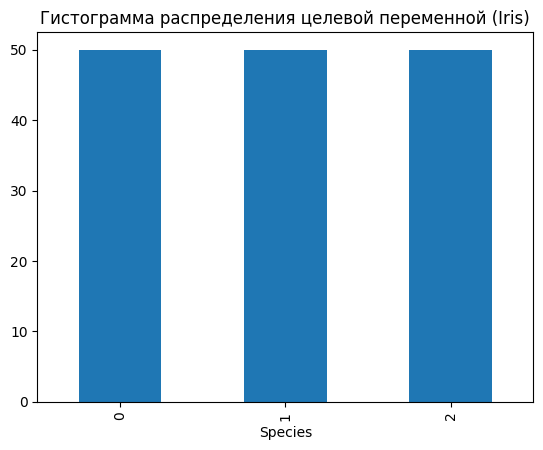

In [21]:
iris_data['Species'].value_counts().plot(kind='bar');
plt.title('Гистограмма распределения целевой переменной (Iris)')

2. Разделение данных на обучающую и тестовую выборки

In [22]:
# Для данных о домах
X_house = house_data.drop("MEDV", axis=1)
y_house = house_data["MEDV"]
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(
    X_house, y_house, test_size=0.3, random_state=42
)

In [23]:
# Для данных об ирисах
X_iris = iris_data.drop("Species", axis=1)
y_iris = iris_data["Species"]
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42)

3. Создание и обучение модели регрессии

In [24]:
# Создание модели линейной регрессии
model_regression = LinearRegression()

In [25]:
# Обучение модели на обучающей выборке
model_regression.fit(X_house_train, y_house_train)

LinearRegression()

4. Оценка качества модели регрессии

In [26]:
# Предсказание на тестовой выборке
y_house_pred = model_regression.predict(X_house_test)

In [27]:
# Вычисление метрик качества
mae = mean_absolute_error(y_house_test, y_house_pred)
11
mse = mean_squared_error(y_house_test, y_house_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_house_test, y_house_pred)
# Вывод результатов
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


MAE: 3.18
MSE: 21.91
RMSE: 4.68
R^2: 0.71


Эти данные позволяют сделать следующие выводы:

Rjhtym cреднеквадратической ошибки (RMSE): 4.67

 RMSE  - это мера того, насколько хорошо модель предсказывает фактические значения.
 Чем меньше RMSE, тем лучше модель.


Коэффициент детерминации (R^2): 0.71

 R^2  - это мера того, насколько хорошо модель объясняет изменения в данных.
 R^2 принимает значения от 0 до 1. Чем ближе R^2 к 1, тем лучше модель объясняет данные.
 В данном случае R^2 равен 0.71, что означает, что модель объясняет 71% изменений в данных.
 Это хороший показатель, так как  R^2 больше 0.5, что свидетельствует о том, что модель достаточно хорошо объясняет данные.

Вывод:

 Модель достаточно неплохо предсказывает фактические значения, но есть пространство для улучшения.
 R^2 показывает, что модель хорошо объясняет изменения в данных.
 Для более точной оценки качества модели необходимо знать конкретную задачу и тип данных.

Рекомендуемые действия:

 Сравнить эту модель с другими моделями, чтобы оценить ее эффективность.
 Попробовать улучшить модель, например, добавив новые переменные или изменив алгоритм.
 Проанализировать остатки модели, чтобы проверить,  есть ли какие-то систематические ошибки.

5. Создание и обучение модели классификации

In [28]:
# Создание модели k-ближайших соседей
model_classification = KNeighborsClassifier(n_neighbors=2)

In [29]:
# Обучение модели k-neibours на обучающей выборке
model_classification.fit(X_iris_train, y_iris_train)

KNeighborsClassifier(n_neighbors=2)

6. Оценка качества модели классификации

**K-neibours**

In [30]:
# Предсказание на тестовой выборке
y_iris_pred1 = model_classification.predict(X_iris_test)

In [31]:
# Вычисление метрик качества
accuracy = accuracy_score(y_iris_test, y_iris_pred1)
precision = precision_score(y_iris_test, y_iris_pred1, average="macro")
recall = recall_score(y_iris_test, y_iris_pred1, average="macro")
f1 = f1_score(y_iris_test, y_iris_pred1, average="macro")
confusion_mat = confusion_matrix(y_iris_test, y_iris_pred1)


In [32]:
print(f"Точность: {accuracy:.2f}")
print(f"Точность (Precision): {precision:.2f}")
print(f"Полнота (Recall): {recall:.2f}")
print(f"F1-мера: {f1:.2f}")
print("Матрица ошибок:\n", confusion_mat)

Точность: 1.00
Точность (Precision): 1.00
Полнота (Recall): 1.00
F1-мера: 1.00
Матрица ошибок:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [33]:
print(classification_report(y_iris_test, y_iris_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [34]:
import seaborn as sns

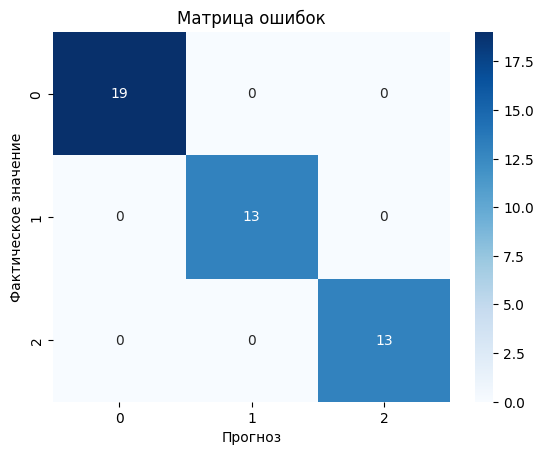

In [35]:
# Визуализация матрицы ошибок
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

Эти данные показывают идеальную производительность модели.

Объяснение:

 Точность (Precision)  = 1.00 означает, что все предсказанные положительные случаи были действительно положительными. Другими словами, модель не сделала ни одной ложноположительной ошибки.
 Полнота (Recall) = 1.00 означает, что модель нашла все положительные случаи. Другими словами, модель не пропустила ни одного положительного случая.
 F1-мера = 1.00  является гармоническим средним точности и полноты. Поскольку оба показателя равны 1.00, F1-мера также равна 1.00, что подтверждает идеальную производительность модели.

В целом, данные указывают на то, что модель прекрасно справляется с задачей классификации и не делает ошибок.

Однако, важно учитывать контекст:

 Размер выборки: Идеальные показатели могут быть достигнуты на очень маленькой выборке.
 Сложность задачи: Простые задачи классификации могут быть легко решены даже простыми моделями.
 Сбалансированность данных: Идеальные показатели могут быть достигнуты, если данные сильно сбалансированы (т.е. количество положительных и отрицательных примеров одинаково).

Важно проверить эти показатели на разных выборках данных (например, на тестовой выборке), чтобы убедиться, что модель действительно работает хорошо и не переобучается.

**Интерпретация confusion_matrix - в тестовой выборке все 19 объектов класса 0 были правильно отнесены к классу 0, все 13 объектов класса 1 были правильно отнесены к классу 1, все 13 объектов класса 2 были правильно отнесены к классу 2, неправильно классифицированных объектов не было.**

*Кривые ROC и показатель AUC*

Интерпретация метрик качества на примере набора diabetes-dataset с помощью модели CatBoost

In [36]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [39]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.000000,3.703500,3.306063,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,2000.000000,121.182500,32.068636,0.000000,99.000000,117.000000,141.000000,199.000000
BloodPressure,2000.000000,69.145500,19.188315,0.000000,63.500000,72.000000,80.000000,122.000000
SkinThickness,2000.000000,20.935000,16.103243,0.000000,0.000000,23.000000,32.000000,110.000000
Insulin,2000.000000,80.254000,111.180534,0.000000,0.000000,40.000000,130.000000,744.000000
BMI,2000.000000,32.193000,8.149901,0.000000,27.375000,32.300000,36.800000,80.600000
DiabetesPedigreeFunction,2000.000000,0.470930,0.323553,0.078000,0.244000,0.376000,0.624000,2.420000
Age,2000.000000,33.090500,11.786423,21.000000,24.000000,29.000000,40.000000,81.000000
Outcome,2000.000000,0.342000,0.474498,0.000000,0.000000,0.000000,1.000000,1.000000


In [40]:
df.drop(df[(df['Glucose'] == 0) | (df['BMI'] == 0) | (df['BloodPressure'] == 0)].index, inplace=True)

In [41]:
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df = df.drop(['Insulin'], axis=1)

<ipython-input-41-1b3d4d14830d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].replace(0, np.nan, inplace=True)


In [44]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00


In [45]:
from catboost import CatBoostClassifier

In [46]:
X = df.drop(["Outcome", "Pregnancies", 'SkinThickness'], axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
model.fit(X_train, y_train)

0:	learn: 0.6461119	total: 50.7ms	remaining: 50.7s
1:	learn: 0.6017291	total: 53ms	remaining: 26.5s
2:	learn: 0.5690937	total: 56.3ms	remaining: 18.7s
3:	learn: 0.5388066	total: 68.1ms	remaining: 17s
4:	learn: 0.5162977	total: 71.1ms	remaining: 14.1s
5:	learn: 0.4964039	total: 75.6ms	remaining: 12.5s
6:	learn: 0.4791370	total: 84.1ms	remaining: 11.9s
7:	learn: 0.4638622	total: 87.3ms	remaining: 10.8s
8:	learn: 0.4503406	total: 91.9ms	remaining: 10.1s
9:	learn: 0.4409371	total: 96.2ms	remaining: 9.52s
10:	learn: 0.4342257	total: 106ms	remaining: 9.49s
11:	learn: 0.4211470	total: 113ms	remaining: 9.29s
12:	learn: 0.4156401	total: 116ms	remaining: 8.78s
13:	learn: 0.4072120	total: 120ms	remaining: 8.47s
14:	learn: 0.4013991	total: 122ms	remaining: 8.01s
15:	learn: 0.3932530	total: 131ms	remaining: 8.04s
16:	learn: 0.3879542	total: 132ms	remaining: 7.65s
17:	learn: 0.3832104	total: 138ms	remaining: 7.55s
18:	learn: 0.3761696	total: 140ms	remaining: 7.22s
19:	learn: 0.3709016	total: 141ms	r

In [48]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9682539682539683


In [49]:
y_pred = model.predict(X_test)

In [50]:
# Вычисление метрик качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
confusion_mat = confusion_matrix(y_test, y_pred)

In [51]:
print(f"Точность: {accuracy:.2f}")
print(f"Точность (Precision): {precision:.2f}")
print(f"Полнота (Recall): {recall:.2f}")
print(f"F1-мера: {f1:.2f}")
print("Матрица ошибок:\n", confusion_mat)

Точность: 0.97
Точность (Precision): 0.96
Полнота (Recall): 0.98
F1-мера: 0.97
Матрица ошибок:
 [[239  12]
 [  0 127]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       251
           1       0.91      1.00      0.95       127

    accuracy                           0.97       378
   macro avg       0.96      0.98      0.97       378
weighted avg       0.97      0.97      0.97       378



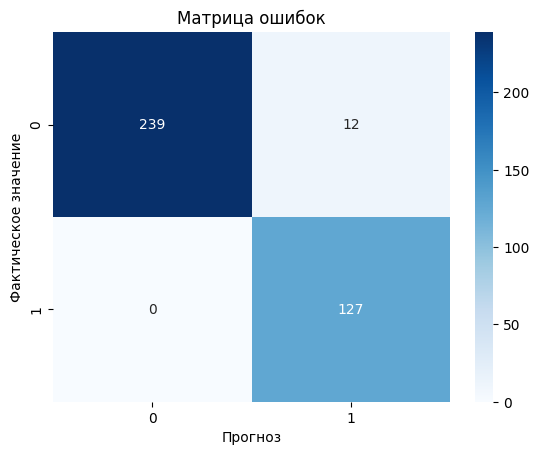

In [53]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

Модель правильно нашла 95% всех случаев с 0 целевым значением (нет диабета), 100% всех случаев с 1 целевым значением (диабет есть); из всех предсказаний объектов со значением 0 модель оказалась права в 100% случаев, из всех предсказаний объектов со значением 1 модель оказалась права в 91% случаев.

В тестовой выборке 12 объектов ошибочно были классифицированы, как позитивные (False Positive) - ошибочно поставлен диагноз наличия диабета. Непоставленного диагноза при его наличии модель не допустила.

In [60]:
#Предсказываем вероятности
y_pred_proba = model.predict_proba(X_test)[:, 1]

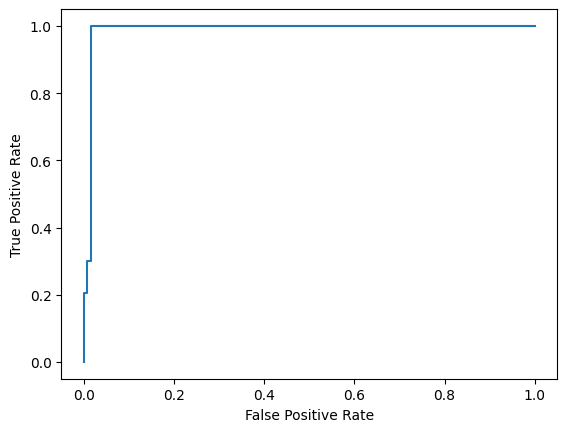

In [61]:
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Находим значение показателя AUC

In [62]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)

AUC: 0.988


In [63]:
import plotly.graph_objs as go

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

Показатель AUC (Area under Curve) - площади под кривой ROC - интерпретирует вероятность, с которой модель верно определит две точки (объекта), расположенные в разных классах, которые поданы ей на вход для анализа. В нашем случае это вероятность 98,8%. Показатель 50% (площадь под синей пунктирной кривой - вариант случайного выбора, рандомного угадывания)